In [165]:
import pandas as pd

In [166]:
from pathlib import Path

In [167]:
in_dir = Path('/Users/danve/Downloads/logs-2/')

In [168]:
logs = []

for f in in_dir.iterdir():
    try:
        this_log = pd.read_csv(f)
    except:
        print(f)

    if '12-11_05-10' not in f.name:
       continue

    logs.append(this_log)

/Users/danve/Downloads/logs-2/step_log_2023-12-10_05-43.csv


In [169]:
all_logs = pd.concat(logs)

In [170]:
all_logs['Unmet Demand'].min()

19864134.0

In [171]:
all_logs = all_logs.reset_index()

In [172]:
all_logs['Unmet Demand'].argmin()

5336

In [173]:
all_logs

index  Episode  Total Reward  Epsilon  Cell Index Action Type    Reward  \
0         0      NaN           NaN      NaN      1631.0        wind   16456.0   
1         1      NaN           NaN      NaN      1137.0       solar   86444.0   
2         2      NaN           NaN      NaN        53.0       solar   97051.0   
3         3      NaN           NaN      NaN       269.0       solar  102082.0   
4         4      NaN           NaN      NaN      1105.0       solar   86778.0   
...     ...      ...           ...      ...         ...         ...       ...   
7129   7129      NaN           NaN      NaN      1066.0       solar   95605.0   
7130   7130      NaN           NaN      NaN      1192.0        wind    3811.0   
7131   7131      NaN           NaN      NaN      1751.0       solar   96921.0   
7132   7132      NaN           NaN      NaN      1917.0       solar  106432.0   
7133   7133      NaN           NaN      NaN       900.0        wind    5451.0   

      Energy Output  Unmet Demand  
0           91442.0    57096057.0  
1          541172.0    56646327.0  
2         1038497.0    56149002.0  
3         1561567.0    55625932.0  
4         2012817.0    55174682.0  
...             ...           ...  
7129      9209249.0    47978250.0  
7130      9242152.0    47945347.0  
7131      9735677.0    47451822.0  
7132     10274137.0    46913362.0  
7133     10319584.0    46867915.0  

[7134 rows x 9 columns]

In [174]:
import numpy as np

rewards = []
best_unmet = []

for idx, row in all_logs.iterrows():
    #print(','.join([str(i) for i in row.values]))

    if not np.isnan(row.values[2]):
        rewards.append(row.values[2])
        best_unmet.append(all_logs.loc[idx-1, 'Unmet Demand'])

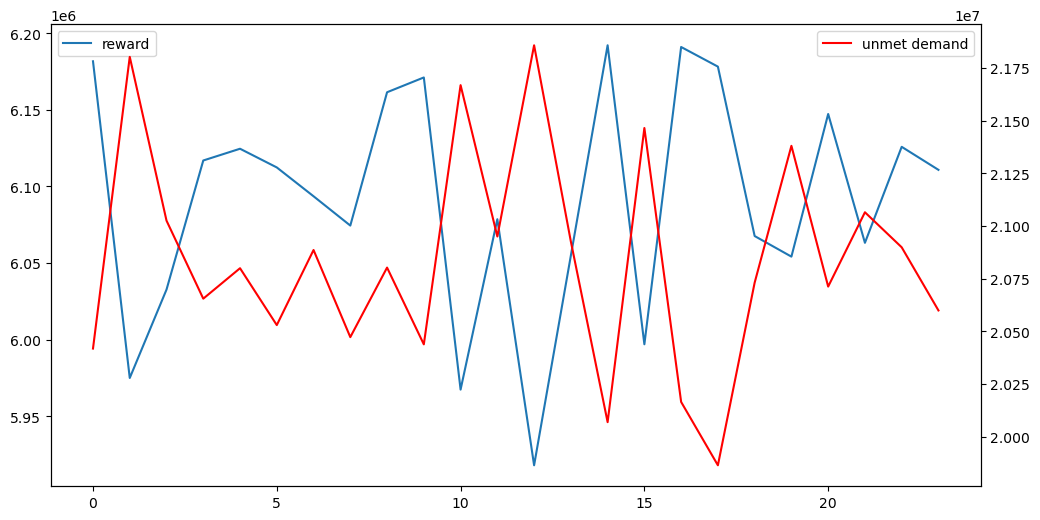

In [175]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

ax.plot(rewards, label='reward')
ax2.plot(best_unmet, color='red', label='unmet demand')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

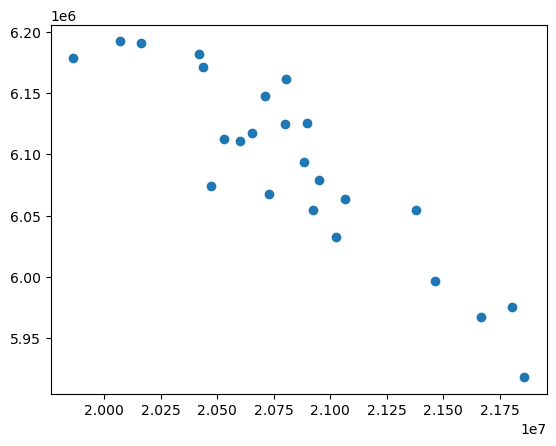

In [176]:
%matplotlib inline



plt.scatter(best_unmet, rewards)

In [177]:
filtered_reward = [reward for reward, unmet in zip(rewards, best_unmet) if reward > 3e6 and unmet < 4e7]
filtered_unmet = [unmet for reward, unmet in zip(rewards, best_unmet) if reward > 3e6 and unmet < 4e7]

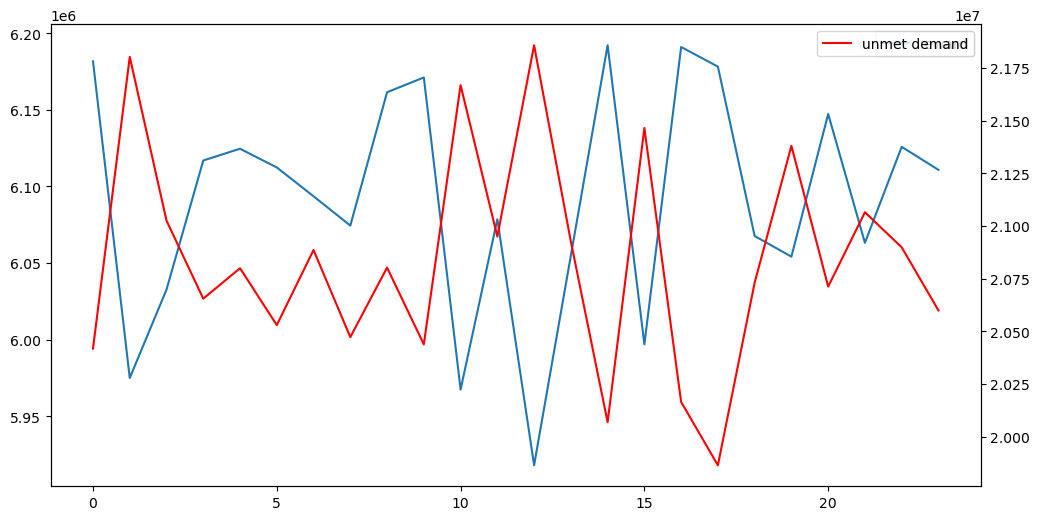

In [178]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

ax.plot(filtered_reward, label='reward')
ax2.plot(filtered_unmet, color='red', label='unmet demand')

ax.legend()
ax2.legend(loc='upper right')

In [179]:
all_logs['Episode'] = all_logs['Episode'].bfill()
all_logs['Total Reward'] = all_logs['Total Reward'].bfill()

In [180]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 2).sum()

0

In [181]:
(all_logs.groupby(by=['Episode', 'Cell Index']).size().sort_values() == 1).sum()

7057

In [182]:
all_logs

index  Episode  Total Reward  Epsilon  Cell Index Action Type    Reward  \
0         0      1.0  6.181684e+06      NaN      1631.0        wind   16456.0   
1         1      1.0  6.181684e+06      NaN      1137.0       solar   86444.0   
2         2      1.0  6.181684e+06      NaN        53.0       solar   97051.0   
3         3      1.0  6.181684e+06      NaN       269.0       solar  102082.0   
4         4      1.0  6.181684e+06      NaN      1105.0       solar   86778.0   
...     ...      ...           ...      ...         ...         ...       ...   
7129   7129      NaN           NaN      NaN      1066.0       solar   95605.0   
7130   7130      NaN           NaN      NaN      1192.0        wind    3811.0   
7131   7131      NaN           NaN      NaN      1751.0       solar   96921.0   
7132   7132      NaN           NaN      NaN      1917.0       solar  106432.0   
7133   7133      NaN           NaN      NaN       900.0        wind    5451.0   

      Energy Output  Unmet Demand  
0           91442.0    57096057.0  
1          541172.0    56646327.0  
2         1038497.0    56149002.0  
3         1561567.0    55625932.0  
4         2012817.0    55174682.0  
...             ...           ...  
7129      9209249.0    47978250.0  
7130      9242152.0    47945347.0  
7131      9735677.0    47451822.0  
7132     10274137.0    46913362.0  
7133     10319584.0    46867915.0  

[7134 rows x 9 columns]

In [183]:
action_type_agg_count = all_logs.groupby(by=['Episode', 'Action Type']).size()
action_type_agg_count.name = 'count'
action_type_agg_count = action_type_agg_count.reset_index()

unmet_demand = all_logs.groupby(by='Episode').agg({'Unmet Demand': 'min'})
total_reward = all_logs.groupby(by='Episode').agg({'Total Reward': 'last'})

action_type_agg_count = action_type_agg_count.merge(unmet_demand, on='Episode', how='left')
action_type_agg_count = action_type_agg_count.merge(total_reward, on='Episode', how='left')

Text(0, 0.5, 'Unmet Demand at End of Episode')

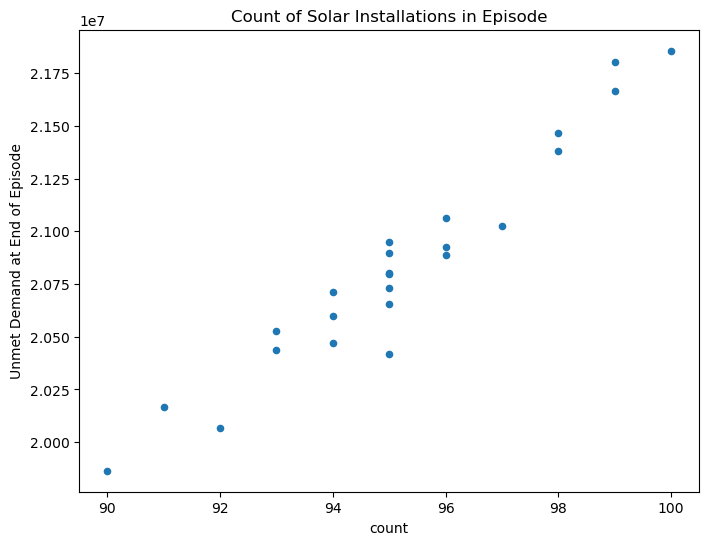

In [184]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Unmet Demand', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Unmet Demand at End of Episode')

Text(0, 0.5, 'Total Reward at End of Episode')

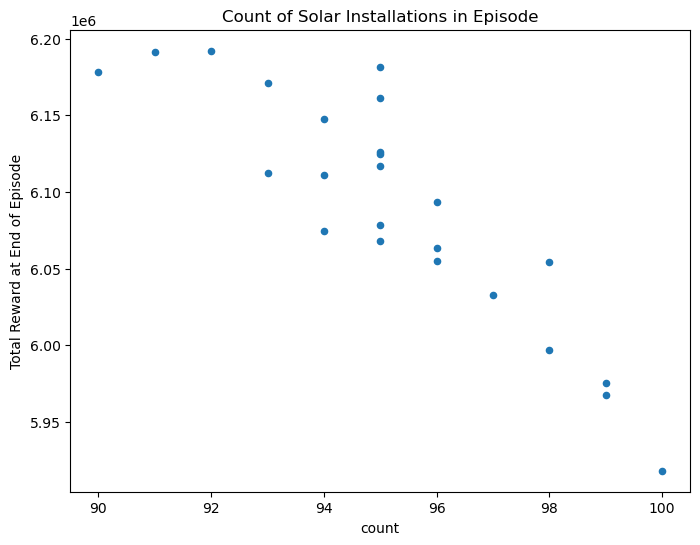

In [185]:
fig, ax = plt.subplots(figsize=(8, 6))

action_type_agg_count.loc[action_type_agg_count['Action Type'] == 'solar'].plot.scatter('count', 'Total Reward', title='Count of Solar Installations in Episode', ax=ax)

ax.set_ylabel('Total Reward at End of Episode')

In [186]:
action_type_agg_count.sort_values(by='Unmet Demand')

Episode Action Type  count  Unmet Demand  Total Reward
35     18.0        wind    251    19864134.0  6.178196e+06
34     18.0       solar     90    19864134.0  6.178196e+06
29     15.0        wind    229    20068814.0  6.192130e+06
28     15.0       solar     92    20068814.0  6.192130e+06
33     17.0        wind    226    20164737.0  6.191003e+06
32     17.0       solar     91    20164737.0  6.191003e+06
0       1.0       solar     95    20417982.0  6.181684e+06
1       1.0        wind    199    20417982.0  6.181684e+06
19     10.0        wind    208    20437907.0  6.171131e+06
18     10.0       solar     93    20437907.0  6.171131e+06
15      8.0        wind    229    20472186.0  6.074475e+06
14      8.0       solar     94    20472186.0  6.074475e+06
10      6.0       solar     93    20529381.0  6.112413e+06
11      6.0        wind    220    20529381.0  6.112413e+06
46     24.0       solar     94    20598892.0  6.110836e+06
47     24.0        wind    212    20598892.0  6.110836e+06
7       4.0        wind    204    20654817.0  6.116944e+06
6       4.0       solar     95    20654817.0  6.116944e+06
41     21.0        wind    196    20712127.0  6.147286e+06
40     21.0       solar     94    20712127.0  6.147286e+06
37     19.0        wind    213    20730803.0  6.067641e+06
36     19.0       solar     95    20730803.0  6.067641e+06
9       5.0        wind    192    20799254.0  6.124612e+06
8       5.0       solar     95    20799254.0  6.124612e+06
16      9.0       solar     95    20802258.0  6.161477e+06
17      9.0        wind    183    20802258.0  6.161477e+06
12      7.0       solar     96    20885693.0  6.093596e+06
13      7.0        wind    193    20885693.0  6.093596e+06
45     23.0        wind    188    20898524.0  6.125863e+06
44     23.0       solar     95    20898524.0  6.125863e+06
26     14.0       solar     96    20925853.0  6.054890e+06
27     14.0        wind    201    20925853.0  6.054890e+06
23     12.0        wind    197    20949674.0  6.078634e+06
22     12.0       solar     95    20949674.0  6.078634e+06
4       3.0       solar     97    21025059.0  6.032700e+06
5       3.0        wind    198    21025059.0  6.032700e+06
42     22.0       solar     96    21064746.0  6.063218e+06
43     22.0        wind    190    21064746.0  6.063218e+06
38     20.0       solar     98    21379988.0  6.054205e+06
39     20.0        wind    166    21379988.0  6.054205e+06
30     16.0       solar     98    21464535.0  5.997004e+06
31     16.0        wind    177    21464535.0  5.997004e+06
21     11.0        wind    170    21668041.0  5.967432e+06
20     11.0       solar     99    21668041.0  5.967432e+06
3       2.0        wind    161    21802175.0  5.975013e+06
2       2.0       solar     99    21802175.0  5.975013e+06
25     13.0        wind    169    21857164.0  5.918046e+06
24     13.0       solar    100    21857164.0  5.918046e+06

In [187]:
action_type_agg_count.sort_values(by='Episode')

Episode Action Type  count  Unmet Demand  Total Reward
0       1.0       solar     95    20417982.0  6.181684e+06
1       1.0        wind    199    20417982.0  6.181684e+06
2       2.0       solar     99    21802175.0  5.975013e+06
3       2.0        wind    161    21802175.0  5.975013e+06
4       3.0       solar     97    21025059.0  6.032700e+06
5       3.0        wind    198    21025059.0  6.032700e+06
6       4.0       solar     95    20654817.0  6.116944e+06
7       4.0        wind    204    20654817.0  6.116944e+06
8       5.0       solar     95    20799254.0  6.124612e+06
9       5.0        wind    192    20799254.0  6.124612e+06
11      6.0        wind    220    20529381.0  6.112413e+06
10      6.0       solar     93    20529381.0  6.112413e+06
12      7.0       solar     96    20885693.0  6.093596e+06
13      7.0        wind    193    20885693.0  6.093596e+06
14      8.0       solar     94    20472186.0  6.074475e+06
15      8.0        wind    229    20472186.0  6.074475e+06
16      9.0       solar     95    20802258.0  6.161477e+06
17      9.0        wind    183    20802258.0  6.161477e+06
18     10.0       solar     93    20437907.0  6.171131e+06
19     10.0        wind    208    20437907.0  6.171131e+06
20     11.0       solar     99    21668041.0  5.967432e+06
21     11.0        wind    170    21668041.0  5.967432e+06
23     12.0        wind    197    20949674.0  6.078634e+06
22     12.0       solar     95    20949674.0  6.078634e+06
24     13.0       solar    100    21857164.0  5.918046e+06
25     13.0        wind    169    21857164.0  5.918046e+06
26     14.0       solar     96    20925853.0  6.054890e+06
27     14.0        wind    201    20925853.0  6.054890e+06
28     15.0       solar     92    20068814.0  6.192130e+06
29     15.0        wind    229    20068814.0  6.192130e+06
30     16.0       solar     98    21464535.0  5.997004e+06
31     16.0        wind    177    21464535.0  5.997004e+06
32     17.0       solar     91    20164737.0  6.191003e+06
33     17.0        wind    226    20164737.0  6.191003e+06
35     18.0        wind    251    19864134.0  6.178196e+06
34     18.0       solar     90    19864134.0  6.178196e+06
36     19.0       solar     95    20730803.0  6.067641e+06
37     19.0        wind    213    20730803.0  6.067641e+06
38     20.0       solar     98    21379988.0  6.054205e+06
39     20.0        wind    166    21379988.0  6.054205e+06
40     21.0       solar     94    20712127.0  6.147286e+06
41     21.0        wind    196    20712127.0  6.147286e+06
42     22.0       solar     96    21064746.0  6.063218e+06
43     22.0        wind    190    21064746.0  6.063218e+06
44     23.0       solar     95    20898524.0  6.125863e+06
45     23.0        wind    188    20898524.0  6.125863e+06
46     24.0       solar     94    20598892.0  6.110836e+06
47     24.0        wind    212    20598892.0  6.110836e+06